# Customer Segmentation

## Cluster Analysis - KMeans - Unsupervised Learning

Refer README to get an overall idea of different bases on which the customers are segmented  
Let's use Cluster analysis(K means)- unsupervised ML algorithm to better segment our customer.
Dataset used: Mall_customer.csv from kaggle

### Importing libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Visualization | statistical graphics
import warnings
import os
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

### Importing the dataset

In [6]:
df=pd.read_csv('C:\\Users\\Karthik\\Documents\\Muthperkalai\\Customer Segementation\\Mall_Customers.csv')

### Data Exploration

In [244]:
df.shape

(200, 5)

In [245]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [247]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Categorize the customers
Age group(18-70):

    18-30: Young Adults
    30-50: Middle aged Adults
    50-70: Old adults

Income group(15-137):
    
    15-40: Low income
    40-70: Mid Income
    70-137:High Income

Spending score(1-100):

    0-40:  Low Spenders
    40-70: Mid Spenders
    70-100:High Spenders

#### Missing values computation

In [248]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Luckily our data has no null values. But this is a very rare situation. In realtime cases we usually encounter null values and we should handle this

### Data Visualization

#### Distribution of Age, Annual income and Spending score data

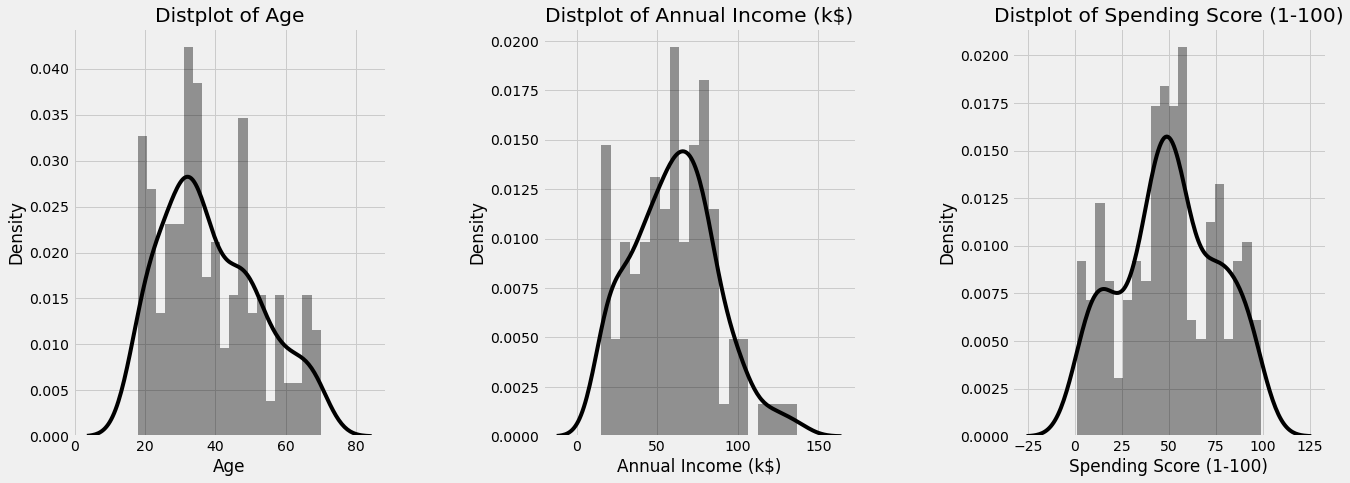

In [236]:
plt.figure(1 ,figsize = (20 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20, color = 'Black')
    plt.title('Distplot of {}'.format(x))
plt.show()

####  Gender

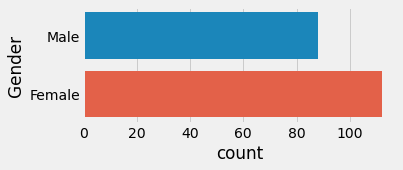

In [249]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (5, 2))
sns.countplot(y = 'Gender' , data = df)
plt.show()

Insights:
Female shops more that Male

Which makes us think
1. Which age group of women shops more?
2. what's their spending score 

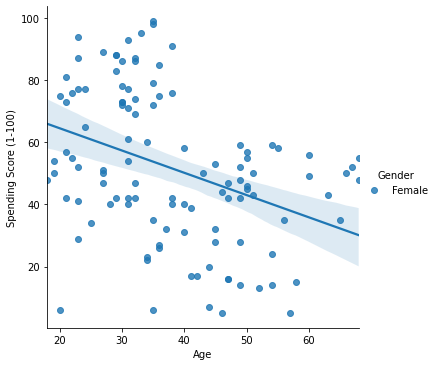

In [17]:
sns.lmplot(x='Age', y='Spending Score (1-100)', hue='Gender', 
           data=df.loc[df['Gender'].isin(['Female'])], 
           fit_reg=True)

Insights:
    
    Female Young adults tend to spends more when compared to Middle aged and Old Adults
    Female young adults: High spenders, Mid spenders
    Middle aged adults: Mid and low spenders
    Old adults: Mid and low spenders

The below visualization helps us in better understanding the spending nature of Female and Male

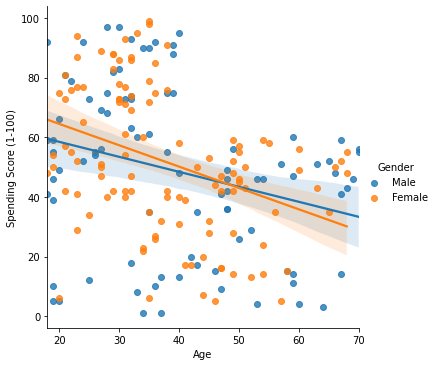

In [13]:
sns.lmplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, fit_reg=True)

Female spenders are more

#### Ploting the Relation between Age , Annual Income and Spending Score

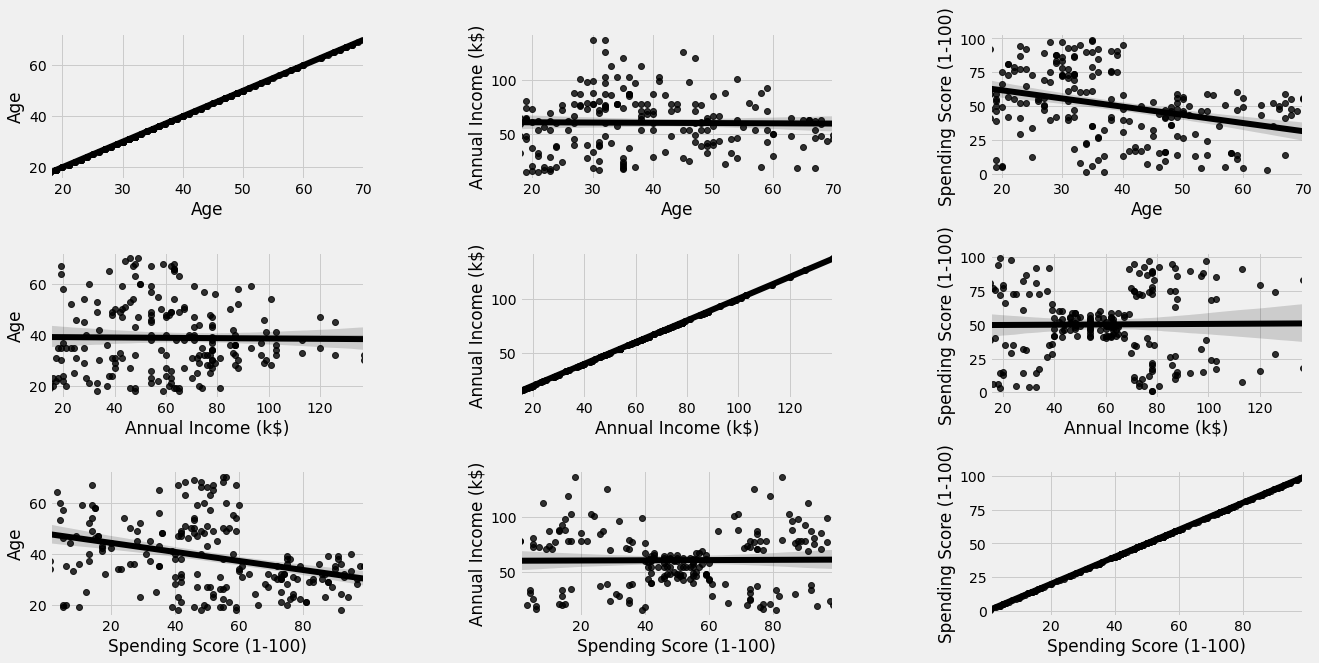

In [274]:
plt.figure(1 , figsize = (20 , 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df, color = 'Black')
plt.show()

Ploting the Relation between Age , Annual Income and Spending Score

Insights:

1. Age and spending are negatively correlated. High spenders are from age group 25-40. This can also be used for clustering but the cluster group is not visually evident
    
2. There is not as such +ve or -ve correlation between Annual income and spending score. 
But this forms clear clusters:
    1. High income - low spenders
    2. High income - high spenders
    3. Medium income - Medium spenders
    4. Low income - low spenders
    5. Low income - High spenders

The above visualization helps us in understanding the correlation relationship between these variable. Lets us look at the correlation value which helps us in knowing the strength of relationship better

In [278]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


From the above correlation matrix, we can see that
1. Age & Annual income - negatively correlated but has very less strength
2. Age & Spending score - negatively correlated but moderate strength 
We can say its highly correlated if its close to 1 or -1

Distribution of values of Age, annual income, Spending score wrt gender

Box plot

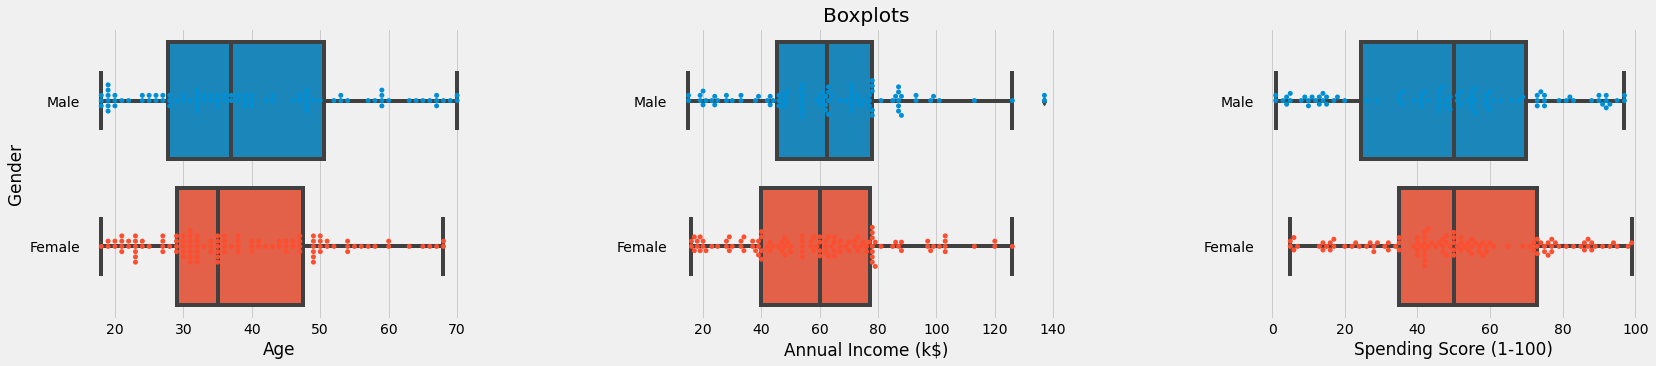

In [256]:
plt.figure(1 , figsize = (25 , 5))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = cols , y = 'Gender', data = df) 
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots' if n == 2 else '')
plt.show()

### Feature selection and Cluster analysis

### 1. Segmentation using Age and Spendings Score

In [276]:
X1=df.iloc[:,[2,4]].values

1. Elbow method - to find optimal number of clusters to be used
2. Model Buidling - K-value is used in Cluster Analysis(Kmeans)

Elbow method

Assumption: Number of clusters = 10

In [232]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    #creating instance for each cluster numbers (iterated from 1 to 10)
    
    kmeans.fit(X1)  
    #Fitting the data
    
    wcss.append(kmeans.inertia_) 
    #formula used to segregate data points into clusters

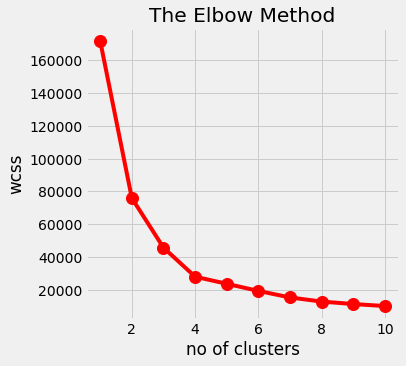

In [238]:
#Visualizing the ELBOW method to find the K value
plt.figure(1 , figsize = (5 , 5))
plt.plot(range(1,11), wcss ,linewidth=4, markersize=12 ,marker='o',color = 'red')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

We can see that the optimal value for K is 4

Model Building 

In [177]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0) # creating the instance
y_kmeans= kmeansmodel.fit_predict(X1) #unsupervised learning

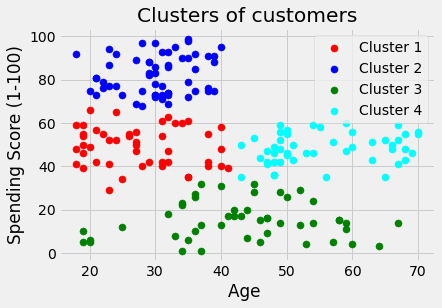

In [281]:
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Insights:
Lets categorize the customers according to their spending scores as

High spenders(70-100), Medium spenders(30-70), Low spenders(0-30)

    1. High spenders: Young adults and a portion of Middle aged adults(30-40) (Cluster 2)
    2. Medium spenders: Young adults, Middle aged and Old adults (Cluster 1) and (Cluster 4)
    3. Low spenders: Middle aged and Old adults
We can see that the customer aged between 20-40 comes under all of the three spending categories which makes us think furthur which income group of this age category belongs to these spending categories(3rd segmentation)

to better put,

    1. High spenders: Young adults and a portion of Middle aged adults(30-40) (Cluster 2)(Income group??)
    2. Medium spenders: Young adults, Middle aged and Old adults (Cluster 1) and (Cluster 4)(Income group??)
    3. Low spenders: Middle aged and Old adults(Cluster 3)(Income group??)

### 2. Segmentation using Annual income and Spendings

In [194]:
X2=df.iloc[:,[3,4]].values

Elbow method

In [197]:
wcss2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans2.fit(X2)  #Fitting the data with Spendings and annual income 
    wcss2.append(kmeans2.inertia_) #formula used to segregate data points into clusters

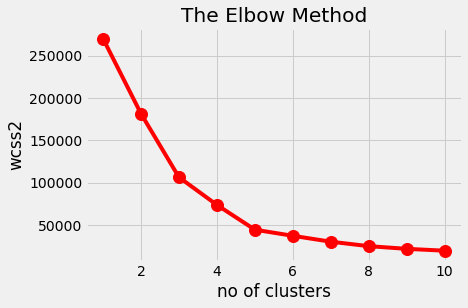

In [220]:
#Visualizing the ELBOW method to find the K value
plt.plot(range(1,11), wcss2, linewidth=4, markersize=12,marker='o',color = 'red')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss2')
plt.show()

We can see that the optimal value for K is 5

Model Building

In [199]:
kmeansmodel2 = KMeans(n_clusters= 5, init='k-means++', random_state=0) # creating the instance
y_kmeans2= kmeansmodel2.fit_predict(X2) #unsupervised learning

Visualizing the clusters

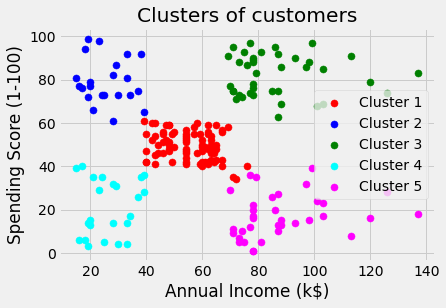

In [284]:
plt.scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans2 == 2, 0], X2[y_kmeans2 == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans2 == 3, 0], X2[y_kmeans2 == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X2[y_kmeans2 == 4, 0], X2[y_kmeans2 == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Insights:
Lets categorize them as 
High income(0-40), Mid Income(40-70), Low income groups(70-140)

We can understand from the above cluster that
1. High spenders(70-100) : Low income group(Clusters 2), High income group(Clusters 3)
2. Medium spenders(30-70): Mid income group (Clusters 1)
3. Low spenders(0-30) : Low income (Clusters 4) , High income group(Clusters 5)
    
Which again lead us to question
1. High spenders(70-100) : Low income group (Age group??), High income group(Age group??)
2. Medium spenders(30-70): Mid income group
3. Low spenders(0-30) : Low income(Age group??), High income group(Age group??)

### 3.Segmentation using Age , Annual Income and Spending Score

In [32]:
X3=df.iloc[:,[2,3,4]].values

Elbow method

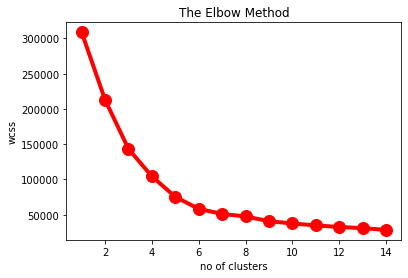

In [33]:
wcss3=[]
for i in range(1,15):
    kmeans3 = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans3.fit(X3)  #Fitting the data with Spendings and annual income 
    wcss3.append(kmeans3.inertia_) #formula used to segregate data points into clusters
    
#Visualizing the ELBOW method to find the K value
plt.plot(range(1,15), wcss3, linewidth=4, markersize=12,marker='o',color = 'red')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Optimal K value = 6, 

Building the model

In [44]:
kmeansmodel3 = KMeans(n_clusters= 6, init='k-means++', random_state=0) # creating the instance
y_kmeans3= kmeansmodel3.fit_predict(X3) #unsupervised learning

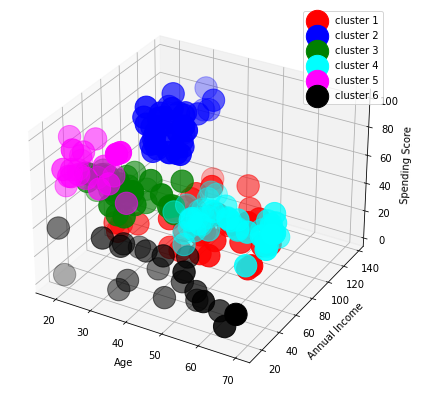

In [56]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[y_kmeans3 == 0,0],X3[y_kmeans3 == 0,1],X3[y_kmeans3 == 0,2], s = 500 , color = 'red', label = "cluster 1")
ax.scatter(X3[y_kmeans3 == 1,0],X3[y_kmeans3 == 1,1],X3[y_kmeans3 == 1,2], s = 500 , color = 'blue', label = "cluster 2")
ax.scatter(X3[y_kmeans3 == 2,0],X3[y_kmeans3 == 2,1],X3[y_kmeans3 == 2,2], s = 500 , color = 'green', label = "cluster 3")
ax.scatter(X3[y_kmeans3 == 3,0],X3[y_kmeans3 == 3,1],X3[y_kmeans3 == 3,2], s = 500 , color = 'cyan', label = "cluster 4")
ax.scatter(X3[y_kmeans3 == 4,0],X3[y_kmeans3 == 4,1],X3[y_kmeans3 == 4,2], s = 500 , color = 'magenta', label = "cluster 5")
ax.scatter(X3[y_kmeans3 == 5,0],X3[y_kmeans3 == 5,1],X3[y_kmeans3 == 5,2], s = 500 , color = 'black', label = "cluster 6")
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

High spenders: Young adults with High income(Cluster2) | Young adults with Mid income (Cluster5)

Mid spenders: Young adults Mid income group(Cluster3) | Middle aged with High income(Cluster 4)

Low spenders: Old aged Low income and Young and middle aged mid income group(cluster 6) | Middle aged High income(Cluster1)

The dataset that we used here has just 200 records. If we have a huge dataset, the clusters can be better segmented, the patterns will be more clear and we can also come with with interesting findings. 

Hope this notebook helped you to get some idea on how Customer segmentation is done